## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [44]:
!pip install xgboost
!pip install imblearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import optuna
from xgboost import XGBClassifier


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
# Загрузка данных
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

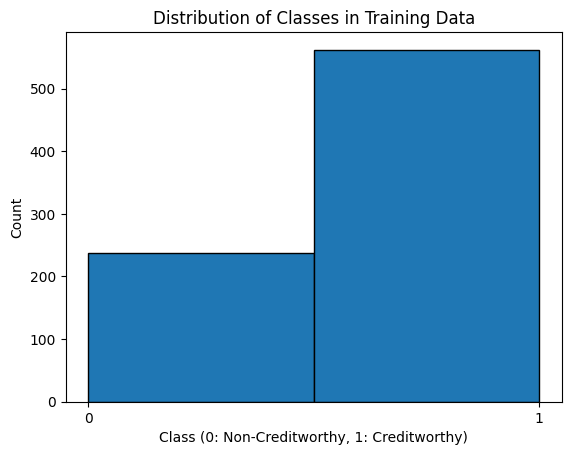

In [61]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [62]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [223]:
# Обучение Random Forest
rf_model = RandomForestClassifier(n_estimators=300, random_state=200)
rf_model.fit(X_train_resampled, y_train_resampled)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred_proba)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.81
Accuracy: 0.79
Precision: 0.83
Recall: 0.87


In [406]:
# Обучение Gradient Boosting
#gb_model = GradientBoostingClassifier(n_estimators=100, random_state=15, min_samples_leaf=2, max_features=8)0,795
gb_model = GradientBoostingClassifier(n_estimators=109, random_state=15, min_samples_leaf=2, max_features=8)
gb_model.fit(X_train_resampled, y_train_resampled)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred_proba)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("Gradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Gradient Boosting метрики:
ROC AUC: 0.80
Accuracy: 0.79
Precision: 0.86
Recall: 0.83


In [445]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(random_state=71, hidden_layer_sizes=(18,), max_iter=33, batch_size=45)
mlp_model.fit(X_train_resampled, y_train_resampled)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)
mlp_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred_proba)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("MLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")

MLP (Neural Network) метрики:
ROC AUC: 0.78
Accuracy: 0.74
Precision: 0.85
Recall: 0.76


c:\Users\Mel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (33) reached and the optimization hasn't converged yet.
  warnings.warn(


In [218]:
from sklearn.model_selection import GridSearchCV

# Оптимизация гиперпараметров для Random Forest
rf_param_grid = {
    'n_estimators': [50, 55, 60, 100, 150, 151, 153, 200, 250, 300, 350],
    'random_state': [None, 10, 20, 30, 40, 50, 60, 70, 100, 150],
}

rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, 
                               scoring='roc_auc', cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print("Лучшие параметры для Random Forest:")
print(rf_grid_search.best_params_)
print(f"Лучший ROC AUC: {rf_grid_search.best_score_:.2f}")

# Обучение модели с оптимизированными параметрами
rf_best_model = rf_grid_search.best_estimator_
rf_best_pred = rf_best_model.predict(X_test)

# Расчет метрик для лучшей модели Random Forest
rf_best_roc_auc = roc_auc_score(y_test, rf_best_pred)
print(f"ROC AUC на тестовых данных: {rf_best_roc_auc:.2f}")

# Оптимизация гиперпараметров для Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': [2, 4, 6, 8, 10],
    'random_state': [10, 15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2]
}

gb_grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_param_grid,
                               scoring='roc_auc', cv=5, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

print("Лучшие параметры для Gradient Boosting:")
print(gb_grid_search.best_params_)
print(f"Лучший ROC AUC: {gb_grid_search.best_score_:.2f}")

# Обучение модели с оптимизированными параметрами
gb_best_model = gb_grid_search.best_estimator_
gb_best_pred = gb_best_model.predict(X_test)

# Расчет метрик для лучшей модели Gradient Boosting
gb_best_roc_auc = roc_auc_score(y_test, gb_best_pred)
print(f"ROC AUC на тестовых данных: {gb_best_roc_auc:.2f}")

# Оптимизация гиперпараметров для MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(150,), (200,), (250,), (270,)],
    'random_state': [120, 140, 160, 180],
    'max_iter': [25, 35, 45, 55, 65, 71. ],
    'batch_size': [11, 21, 31, 41, 50, 70, 91, 103],
}

mlp_grid_search = GridSearchCV(MLPClassifier(max_iter=500, random_state=42), mlp_param_grid,
                                scoring='roc_auc', cv=5, n_jobs=-1)
mlp_grid_search.fit(X_train, y_train)

print("nЛучшие параметры для MLP:")
print(mlp_grid_search.best_params_)
print(f"Лучший ROC AUC: {mlp_grid_search.best_score_:.2f}")

# Обучение модели с оптимизированными параметрами
mlp_best_model = mlp_grid_search.best_estimator_
mlp_best_pred = mlp_best_model.predict(X_test)

# Расчет метрик для лучшей модели MLP
mlp_best_roc_auc = roc_auc_score(y_test, mlp_best_pred)
print(f"ROC AUC на тестовых данных: {mlp_best_roc_auc:.2f}")


Лучшие параметры для Random Forest:
{'n_estimators': 153, 'random_state': None}
Лучший ROC AUC: 0.79
ROC AUC на тестовых данных: 0.67


c:\Users\Mel\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Лучшие параметры для Gradient Boosting:
{'max_features': 10, 'min_samples_leaf': 2, 'n_estimators': 100, 'random_state': 15}
Лучший ROC AUC: 0.80
ROC AUC на тестовых данных: 0.70


c:\Users\Mel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 3840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\Mel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", l

nЛучшие параметры для MLP:
{'batch_size': 21, 'hidden_layer_sizes': (150,), 'max_iter': 25, 'random_state': 120}
Лучший ROC AUC: 0.75
ROC AUC на тестовых данных: 0.50


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели